In [1]:
import os
import subprocess
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
from time import time as t
from numba import jit

import json
# import io

# import datetime

import astropy
import astropy.units as u
import astropy.constants as c

# from IPython.display import Image, display_png

from astroquery.simbad import Simbad

import photontools

from IPython.display import display

import mosfit
import corner
# import json
# import matplotlib.pyplot as plt
# import numpy as np
import seaborn as sns
from tqdm import tqdm_notebook
from collections import OrderedDict
from mosfit.plotting import bandcolorf


In [2]:
%matplotlib inline
# %matplotlib notebook

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "stix"
plt.rcParams["font.size"] = 15
plt.rcParams["figure.dpi"] = 150

lss = ['-', '--', '-.', ':']

In [3]:
filepath_hewd = "../../hewd/gamtmp.d"
filepath_cowd = "../../cowd/gamtmp.d"

directory_ML = "/Users/kawana/GoogleDrive/sync/study/yoshidalab/mypaper/0002_WD_TDE_radiation_transfer/WhiteDwarf_Thermonuclear_Transients/"
filepaths_spectra_ML = subprocess.getoutput('find "{}/WD06_spectra/" | grep ".par" | sort'.format(directory_ML)).split("\n")[1:]

vel_cowd = np.array([2.56466437e+03, 1.18143578e+04, -1.41779372e+00]) * 1e5
vel_hewd = np.array([4.49999438e+03, 1.54867843e+04, 1.27477734e+01]) * 1e5
# f_ = open(filepath_, mode="r") 

In [4]:
dir_ca_rich = "../../0002_WD_TDE_radiation_transfer/catalog/Ca-rich_transients/"

# fpaths_ca_rich = subprocess.getoutput('find {} -name "*.json" | sort'.format(dir_ca_rich)).split("\n")
golden_samples = np.array(["SN2005E", "SN2007ke", "SN2010et", "SN2012hn", "SN2016hgs", "PTF11kmb", "PTF11bij", "PTF11kmb", "PTF12bho"])
fpaths_ca_rich = [[]] * len(golden_samples)
for i, name_ in enumerate(golden_samples):
    fpaths_ca_rich[i] = dir_ca_rich + name_ + ".json"
fpaths_ca_rich = np.array(fpaths_ca_rich)

### from tutorial

0


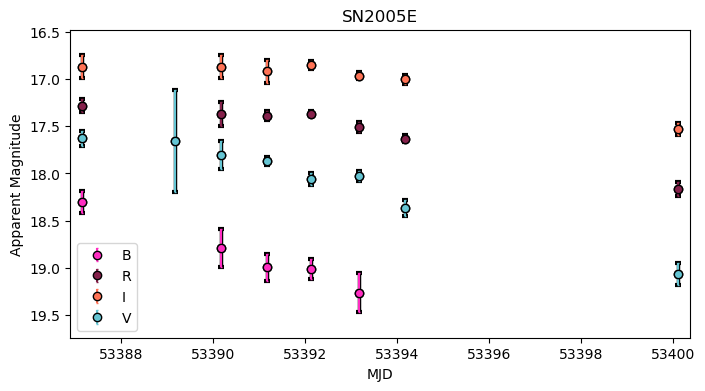

1


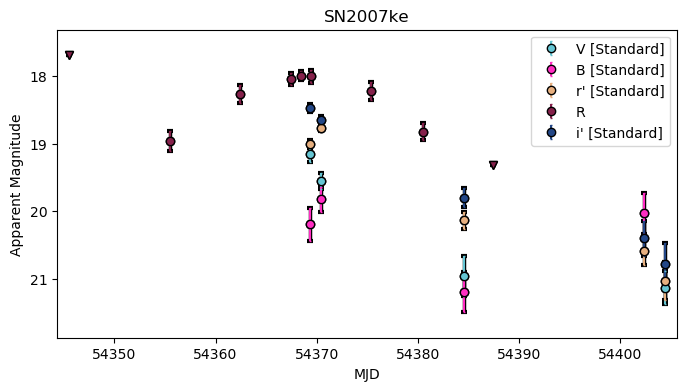

2


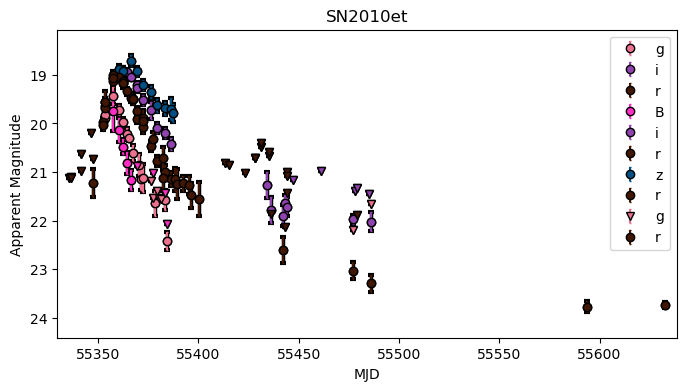

3


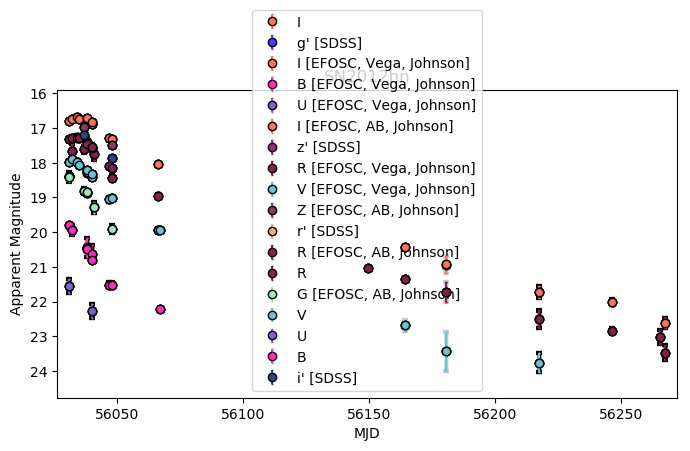

4


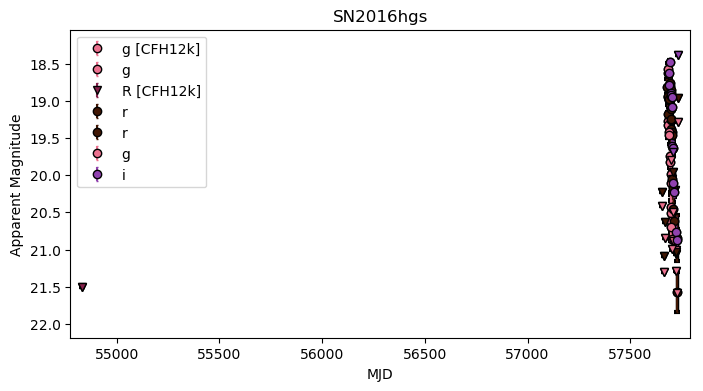

5


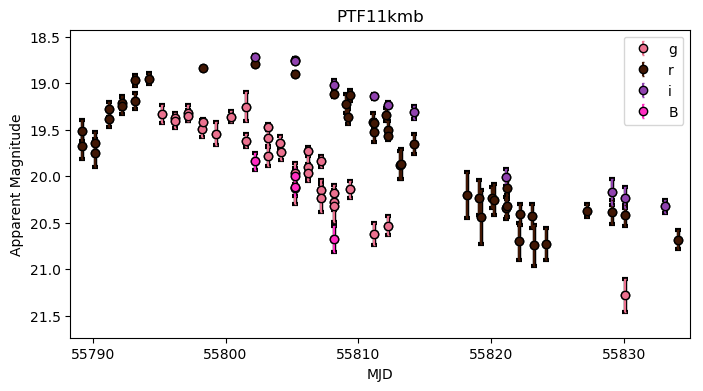

6


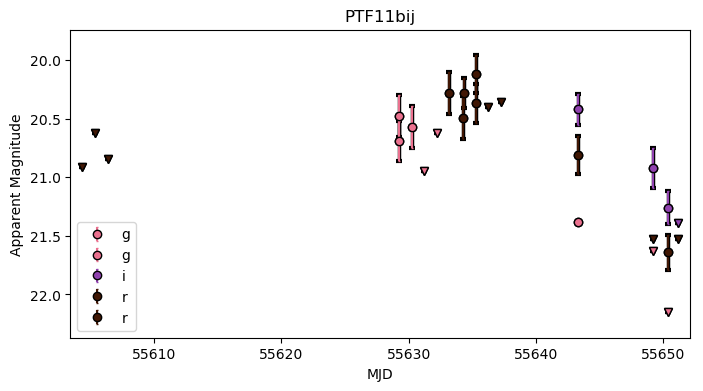

7


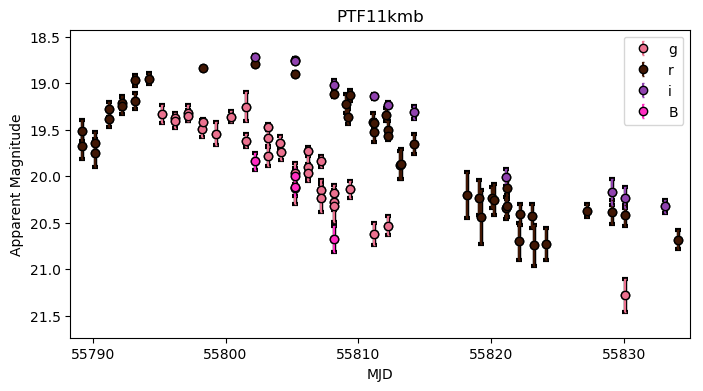

8


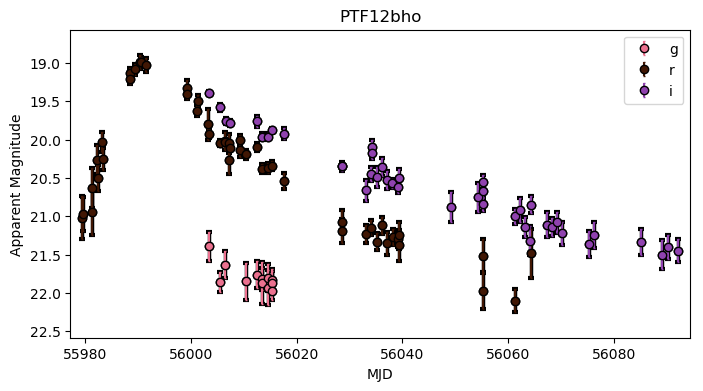

In [49]:
for i ,fpath in enumerate(fpaths_ca_rich):
    print(i)
    
    read_one
    
    fig = plt.figure(figsize = (8, 4))
    ax = plt.gca()
    plot_one_astrocats(fig, ax, fpath)
    plt.show()
    
    
    plt.close()

No handles with labels found to put in legend.


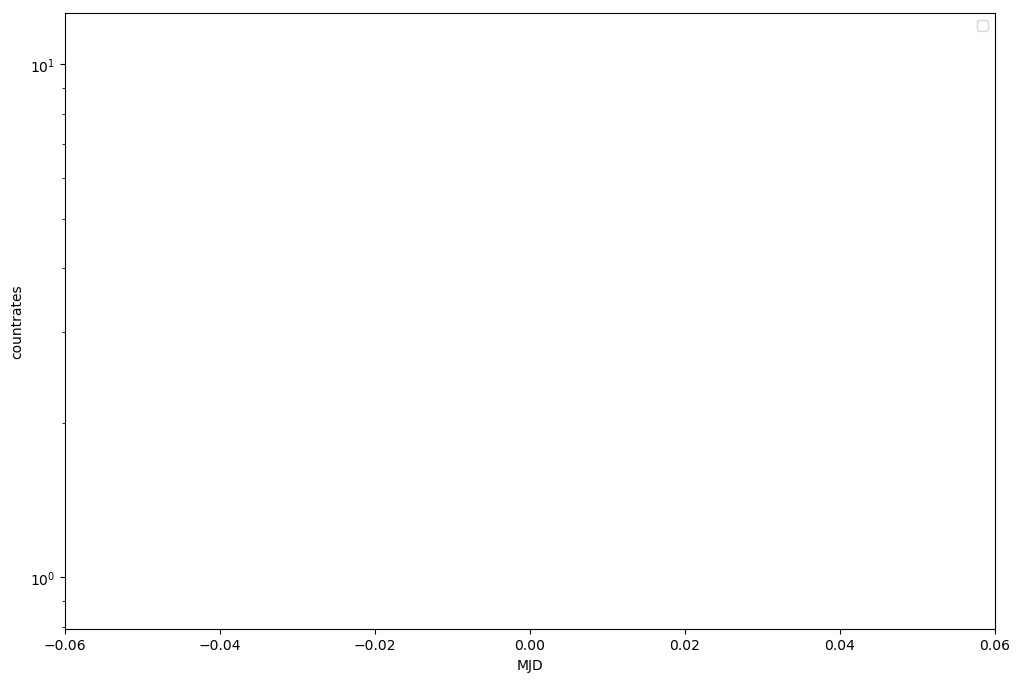

FileNotFoundError: [Errno 2] No such file or directory: '../products/lc_xrays.pdf'

In [23]:
fig = plt.figure(figsize=(12,8))
ax = plt.gca()
used_instruments = []
color = {}
for i in xray_instrument_list:
    color[i[0]] =  next(ax._get_lines.prop_cycler)['color'] # using this to match MOSFiT color scheme

for all_instrument_attr in tqdm_notebook(xray_instrument_list, desc='Photo', leave=False):
    (inst, telscp) = all_instrument_attr
    try:
        inst_exclusive_list
    except:
        pass
    else:
        if inst not in inst_exclusive_list:
            continue
    extra_nice = ', '.join(list(filter(None, OrderedDict.fromkeys((inst, syst)).keys())))
    nice_name = telscp + (('[' + extra_nice + ']') if extra_nice else '')
    realizations = [[] for x in range(len(model['realizations']))]
    alias = ['' for x in range(len(model['realizations']))]
    for ph in photo:
        rn = ph.get('realization', None)
        if rn:
            if tuple(ph.get(y, '') for y in xray_instrument_attr) == all_instrument_attr:
                    realizations[int(rn) - 1].append((float(ph['time']),
                                                      float(ph['countrate']),
                                                      float(ph.get('e_lower_countrate', 0.0)),
                                                      float(ph.get('e_upper_countrate', 0.0))))
                    alias[int(rn) - 1] = ph['realization']
#     for i,rz in enumerate(realizations):
#         if not len(rz):
#             continue
#         xs, ys, vls, vus = zip(*rz)
#         label = ('' if all_instrument_attr in used_instruments or
#                  all_instrument_attr in real_xray_instrument_list else nice_name)
#         if max(vs) == 0.0:
#             plt.plot(xs, ys, color=color[inst],
#                              label=label, linewidth=0.5)
#         else:
#             xs = np.array(xs)
#             ymi = np.array(ys) - np.array(vls)
#             yma = np.array(ys) + np.array(vus)
#             plt.fill_between(xs, ymi, yma, color=color[inst],
#                              label=label, alpha=2.0/len(realizations))

#         if label:
#             used_instruments = list(set(used_instruments + [all_instrument_attr]))
    if real_data:
        for s in range(2):
            if s == 0:
                cond = False
                symb = 'o'
            else:
                cond = True
                symb = 'v'
            vec = [(float(x['time'][0]), float(x['countrate']), float(x.get('e_countrate', 0.0))) for x in photo
                   if 'countrate' in x and 'realization' not in x and
                   'host' not in x and 'includeshost' not in x and
                   x.get('upperlimit', False) == cond and
                   tuple(x.get(y, '') for y in xray_instrument_attr) == all_instrument_attr]  
            
            if not len(vec):
                continue
            xs, ys, yes = zip(*vec)
            label = nice_name if all_instrument_attr not in used_instruments else ''

            plt.errorbar(xs, ys, yerr=yes, color = color[inst], fmt=symb,
                         label=label,
                         markeredgecolor='black', markeredgewidth=1, capsize=5,
                         elinewidth=2, capthick=2, zorder=10)
            plt.errorbar(xs, ys, yerr=yes, color='k', fmt=symb, capsize=6,
                         elinewidth=3, capthick=3, zorder=5) 
            if label:
                used_instruments = list(set(used_instruments + [all_instrument_attr]))
plt.gca().set_xlabel('MJD')
plt.gca().set_ylabel('countrates')
#plt.xlim(55200, 56000)
plt.yscale('log')
#plt.ylim(1e-320,1e20)
plt.margins(0.1,0.1)
plt.legend(loc = 'best')
plt.show()
# fig.savefig('../products/lc_xrays.pdf')